In [1]:
import numpy as np                      
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [46]:
data = pd.read_csv("datasets/heart.csv")

In [47]:
data.shape

(303, 14)

In [48]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [49]:
data["trestbps"]=np.log(data["trestbps"])

In [50]:
data=data.drop(["fbs"],axis=1)
data=data.drop(["ca"],axis=1)

In [51]:
data["chol"]=np.log(data["chol"])
target=data["target"]

In [52]:
data.shape

(303, 12)

In [53]:
data.tail()

,age,sex,cp,trestbps,chol,restecg,thalach,exang,oldpeak,slope,thal,target
298,57,0,0,4.941642,5.484797,1,123,1,0.2,1,3,0
299,45,1,3,4.700480,5.575949,1,132,0,1.2,1,3,0
300,68,1,0,4.969813,5.262690,1,141,0,3.4,1,3,0
301,57,1,0,4.867534,4.875197,1,115,1,1.2,1,3,0
302,57,0,1,4.867534,5.463832,0,174,0,0.0,1,2,0


In [54]:
data.isnull().sum().sum()

0

In [55]:
data.duplicated().sum()

1

In [56]:
data.value_counts().sum()

303

In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   restecg   303 non-null    int64  
 6   thalach   303 non-null    int64  
 7   exang     303 non-null    int64  
 8   oldpeak   303 non-null    float64
 9   slope     303 non-null    int64  
 10  thal      303 non-null    int64  
 11  target    303 non-null    int64  
dtypes: float64(3), int64(9)
memory usage: 28.5 KB


In [58]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.000000,47.500000,55.000000,61.000000,77.000000
sex,303.0,0.683168,0.466011,0.000000,0.000000,1.000000,1.000000,1.000000
cp,303.0,0.966997,1.032052,0.000000,0.000000,1.000000,2.000000,3.000000
trestbps,303.0,4.871396,0.130191,4.543295,4.787492,4.867534,4.941642,5.298317
chol,303.0,5.485514,0.203808,4.836282,5.351858,5.480639,5.614950,6.335054
restecg,303.0,0.528053,0.525860,0.000000,0.000000,1.000000,1.000000,2.000000
thalach,303.0,149.646865,22.905161,71.000000,133.500000,153.000000,166.000000,202.000000
exang,303.0,0.326733,0.469794,0.000000,0.000000,0.000000,1.000000,1.000000
oldpeak,303.0,1.039604,1.161075,0.000000,0.000000,0.800000,1.600000,6.200000
slope,303.0,1.399340,0.616226,0.000000,1.000000,1.000000,2.000000,2.000000


In [59]:
correlation = data.corr()
correlation

,age,sex,cp,trestbps,chol,restecg,thalach,exang,oldpeak,slope,thal,target
age,1.000000,-0.098447,-0.068653,0.275497,0.208845,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.049794,-0.174497,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047675,-0.078691,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.161736,0.433798
trestbps,0.275497,-0.049794,0.047675,1.000000,0.129095,-0.116416,-0.043639,0.060174,0.191717,-0.117060,0.056214,-0.142371
chol,0.208845,-0.174497,-0.078691,0.129095,1.000000,-0.155759,-0.009976,0.073195,0.038338,-0.000896,0.092905,-0.092857
restecg,-0.116211,-0.058196,0.044421,-0.116416,-0.155759,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.043639,-0.009976,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.060174,0.073195,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.191717,0.038338,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.210244,-0.430696
slope,-0.168814,-0.030711,0.119717,-0.117060,-0.000896,0.093045,0.386784,-0.257748,-0.577537,1.000000,-0.104764,0.345877


<Axes: >

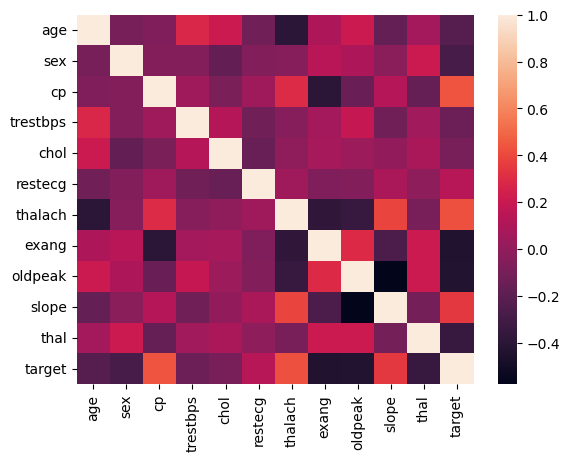

In [60]:
sns.heatmap(correlation)

<Axes: >

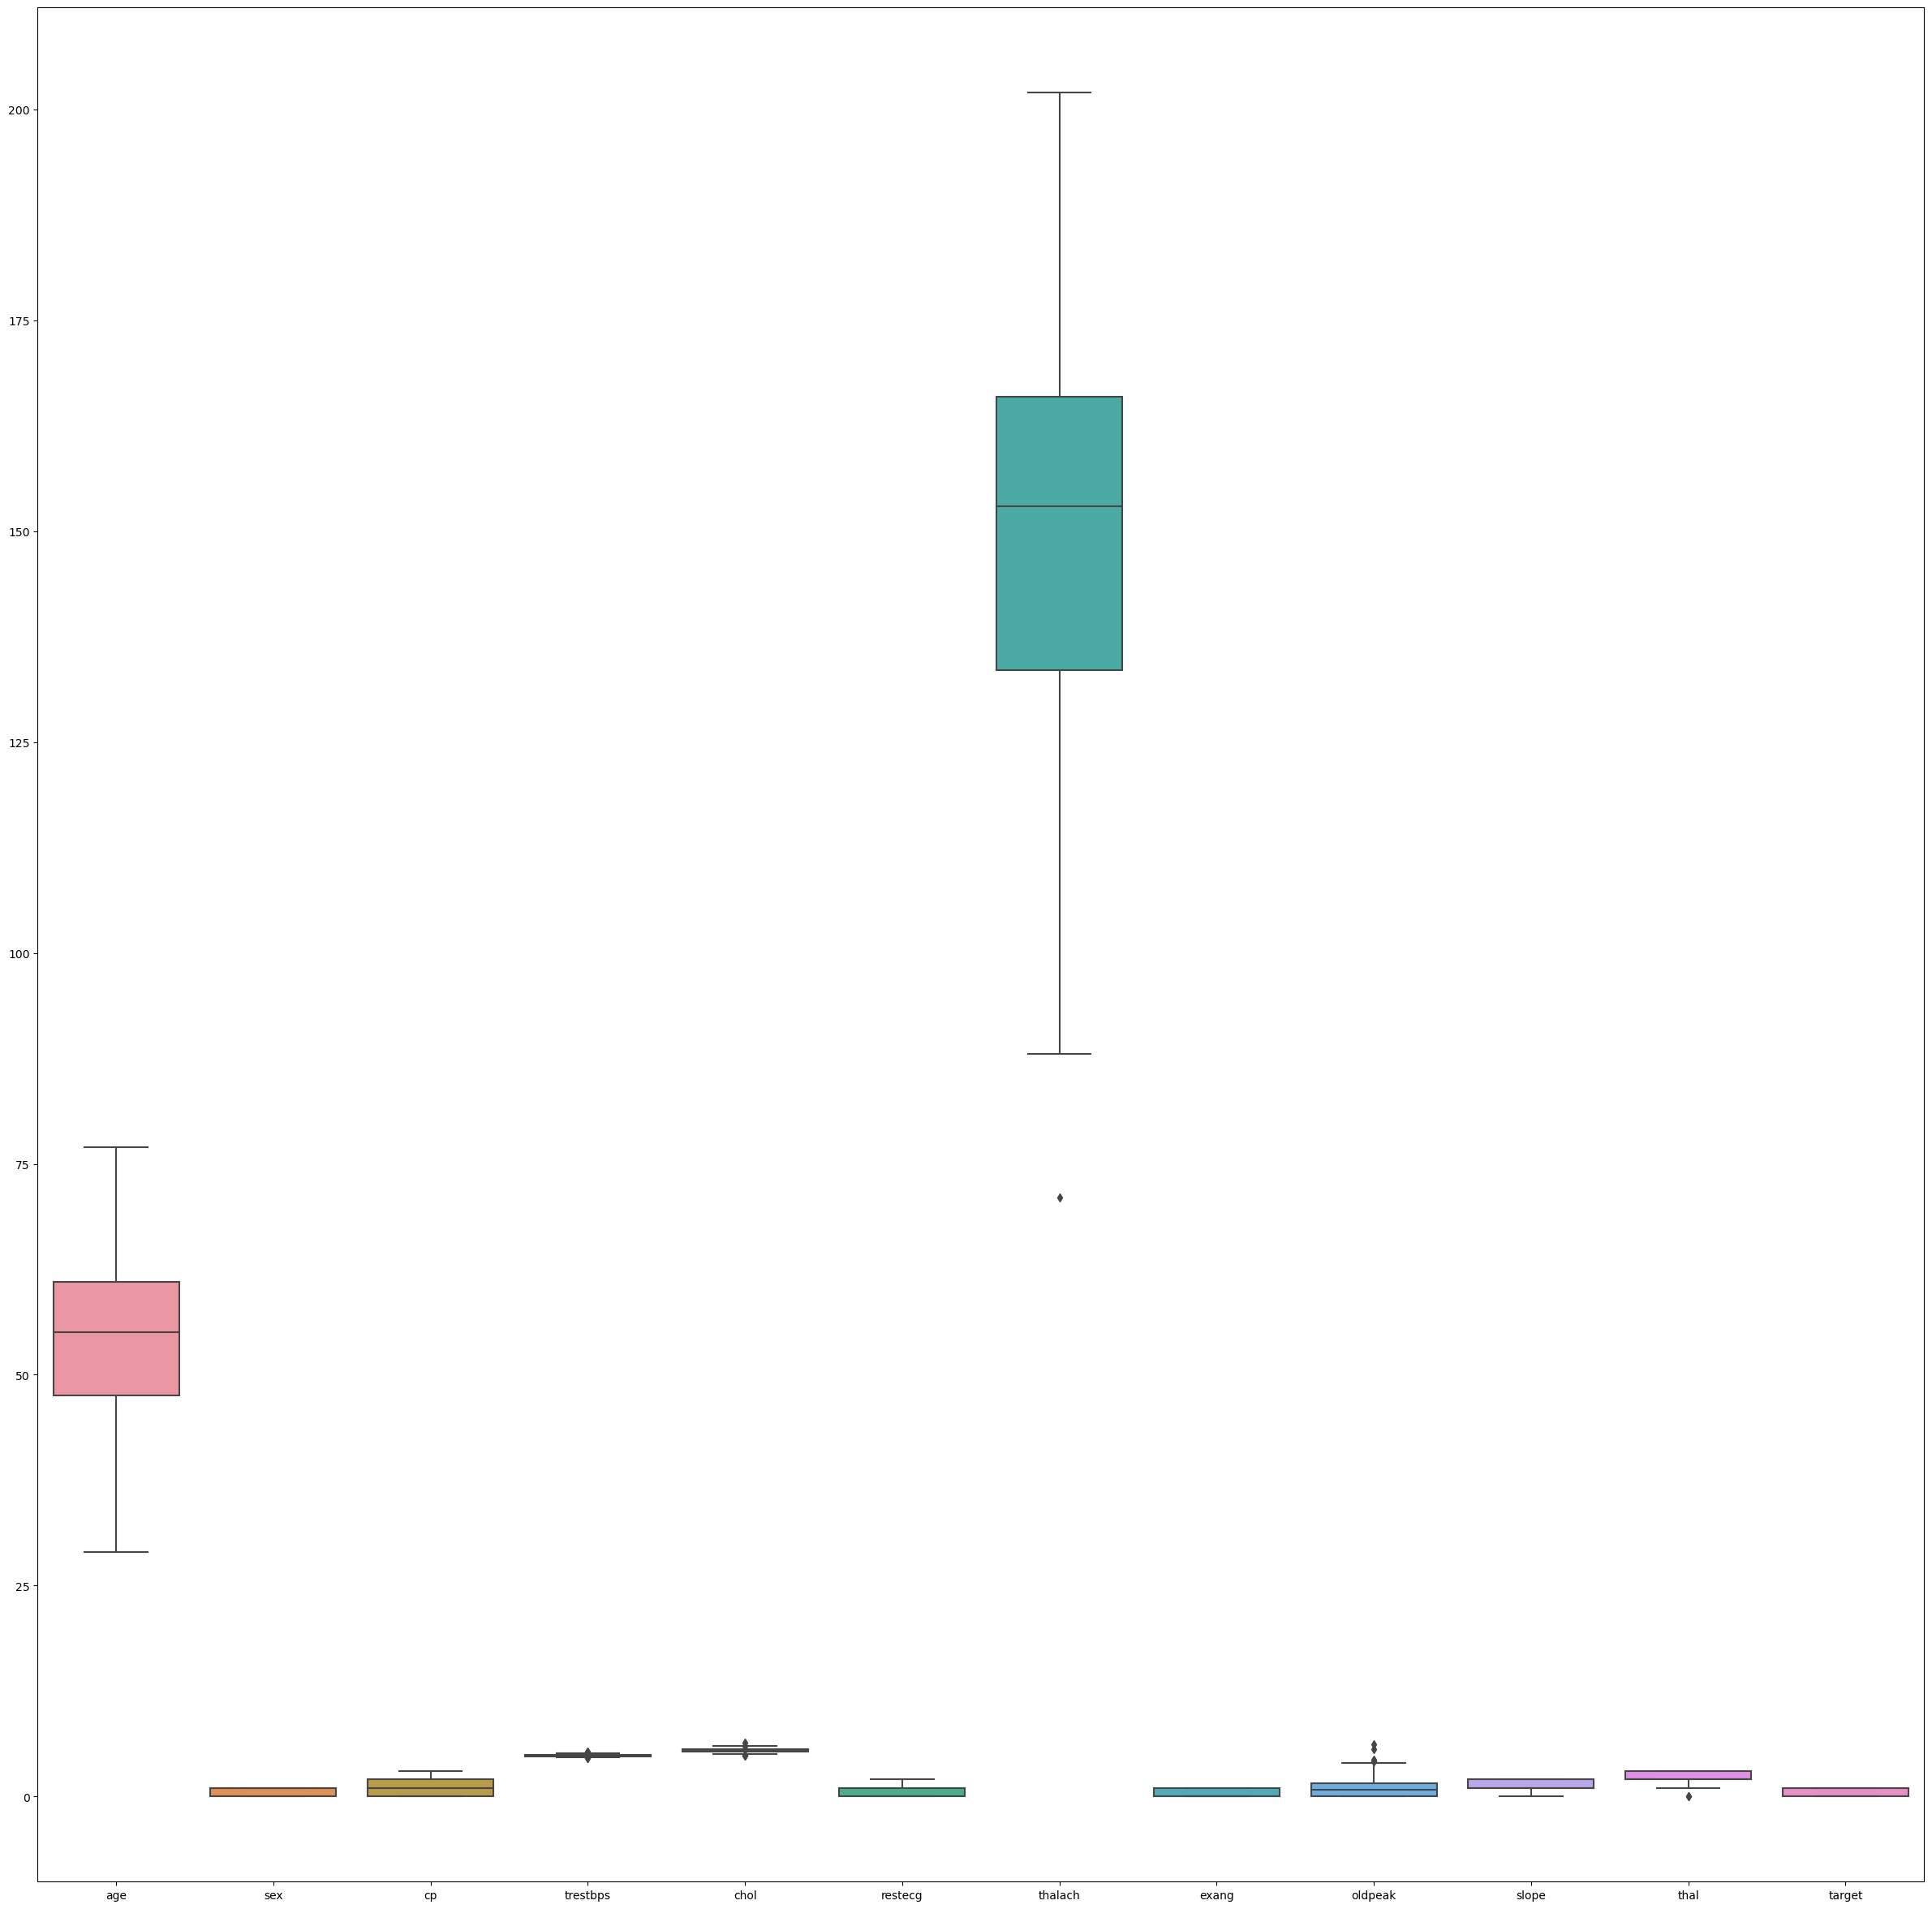

In [61]:
f=plt.figure()
f.set_figwidth(30)
f.set_figheight(30)
sns.boxplot(data)

In [69]:
np.random.shuffle(data.values)

In [70]:
X = data.drop(columns="target")

In [71]:
X.head()

,age,sex,cp,trestbps,chol,restecg,thalach,exang,oldpeak,slope,thal
0,63,1,3,4.976734,5.451038,0,150,0,2.3,0,1
1,37,1,2,4.867534,5.521461,1,187,0,3.5,0,2
2,41,0,1,4.867534,5.318120,0,172,0,1.4,2,2
3,56,1,1,4.787492,5.463832,1,178,0,0.8,2,2
4,57,0,0,4.787492,5.869297,1,163,1,0.6,2,2


In [72]:
Y=data['target']
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [73]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=sc.fit_transform(X)
X[:5]

array([[ 0.9521966 ,  0.68100522,  1.97312292,  0.81044305, -0.16943421,
        -1.00583187,  0.01544279, -0.69663055,  1.08733806, -2.27457861,
        -2.14887271],
       [-1.91531289,  0.68100522,  1.00257707, -0.02970828,  0.17667032,
         0.89896224,  1.63347147, -0.69663055,  2.12257273, -2.27457861,
        -0.51292188],
       [-1.47415758, -1.46841752,  0.03203122, -0.02970828, -0.82268714,
        -1.00583187,  0.97751389, -0.69663055,  0.31091206,  0.97635214,
        -0.51292188],
       [ 0.18017482,  0.68100522,  0.03203122, -0.64553634, -0.10655886,
         0.89896224,  1.23989692, -0.69663055, -0.20670527,  0.97635214,
        -0.51292188],
       [ 0.29046364, -1.46841752, -0.93851463, -0.64553634,  1.88617616,
         0.89896224,  0.58393935,  1.43548113, -0.37924438,  0.97635214,
        -0.51292188]])

In [75]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [77]:
print(data.shape)
print("x train length : ",len(x_train))
print("x test length : ",len(x_test))
print("y train length : ",len(y_train))
print("y test length : ",len(x_test))

(303, 12)
x train length :  242
x test length :  61
y train length :  242
y test length :  61


In [78]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train,y_train)
model

LogisticRegression()

In [79]:
predict_value=model.predict(x_test)
predict_value

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [80]:
from sklearn.metrics import r2_score,accuracy_score,recall_score
print("r2_score : ",r2_score(y_test,predict_value))
print("accuracy_score = ",accuracy_score(y_test,predict_value))
print("recall_score : ",recall_score(y_test,predict_value))

r2_score :  0.47413793103448276
accuracy_score =  0.8688524590163934
recall_score :  0.875


In [81]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,predict_value)
print(cm)

[[25  4]
 [ 4 28]]


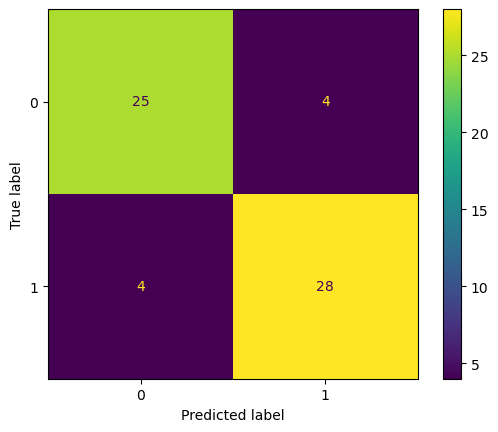

In [82]:
from sklearn.metrics import ConfusionMatrixDisplay
cm=confusion_matrix(y_test,predict_value)
vis=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
vis.plot()
plt.show()

In [88]:
from sklearn.neighbors import KNeighborsClassifier
model1 = KNeighborsClassifier()
model1.fit(x_train,y_train)
model1

KNeighborsClassifier()

In [91]:
predict_value1=model1.predict(x_test)
predict_value1

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [92]:
from sklearn.metrics import r2_score,accuracy_score,recall_score
print("r2_score : ",r2_score(y_test,predict_value1))
print("accuracy_score = ",accuracy_score(y_test,predict_value1))
print("recall_score : ",recall_score(y_test,predict_value1))

r2_score :  0.5398706896551724
accuracy_score =  0.8852459016393442
recall_score :  0.84375


In [95]:
from joblib import dump, load
# Save the model
dump(model, 'heart.pkl')
dump(model1, 'heart1.pkl')
# Load the model
loaded_model = load('heart.pkl')
loaded_model1 = load('heart1.pkl')
# Example prediction (modify according to your actual use case)
prediction = loaded_model.predict(X[:10])
prediction1 = loaded_model1.predict(X[:10])
print(prediction)
print(prediction1)
pred = loaded_model.predict(X)
pred1 = loaded_model1.predict(X)

[1 1 1 1 1 1 1 1 1 1]
[0 0 1 1 1 1 1 1 1 1]


In [96]:
Y[:10]

0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    1
8    1
9    1
Name: target, dtype: int64

array([[ 0.9521966 ,  0.68100522,  1.97312292,  0.81044305, -0.16943421,
        -1.00583187,  0.01544279, -0.69663055,  1.08733806, -2.27457861,
        -2.14887271],
       [-1.91531289,  0.68100522,  1.00257707, -0.02970828,  0.17667032,
         0.89896224,  1.63347147, -0.69663055,  2.12257273, -2.27457861,
        -0.51292188]])